In [5]:
import numpy as np
import procgen_tools
import matplotlib.pyplot as plt
from procgen_tools.imports import *

from procgen_tools import visualization, maze, vfield

In [3]:
CHEESE = 2
EMPTY = 100
BLOCKED = 51
MOUSE = 25  # UNOFFICIAL. The mouse isn't in the grid in procgen.

def visualize_maze(state: maze.EnvState) -> None:
    venv = maze.venv_from_grid(state.inner_grid())
    visualization.visualize_venv(venv, render_padding=False)


In [4]:
# Generate empty maze
maze_dim = 7
grid_empty = np.ones((maze_dim,maze_dim))*EMPTY
venv_empty = maze.venv_from_grid(grid_empty)
#visualize_maze(maze.state_from_venv(venv))

# Generate maze with cheese in location x, y
x=3 
y=3
grid_cheese = np.ones((maze_dim,maze_dim))*EMPTY
grid_cheese[x,y] = CHEESE
venv_cheese = maze.venv_from_grid(grid_cheese)
#visualize_maze(maze.state_from_venv(venv_cheese))



In [6]:
# Load models:
policy1, hook1 = load_model('15', 15)
policy2, hook2 = load_model('1', 15)
AX_SIZE = 3

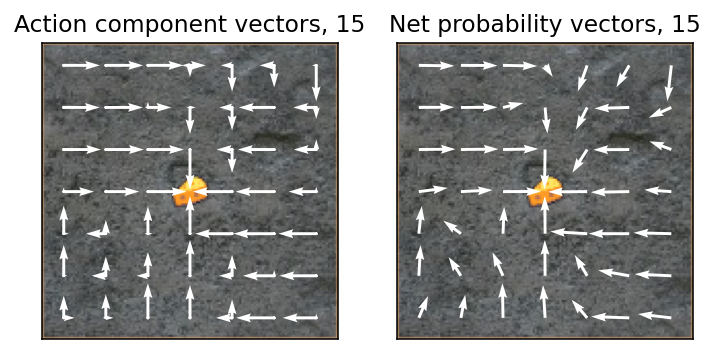

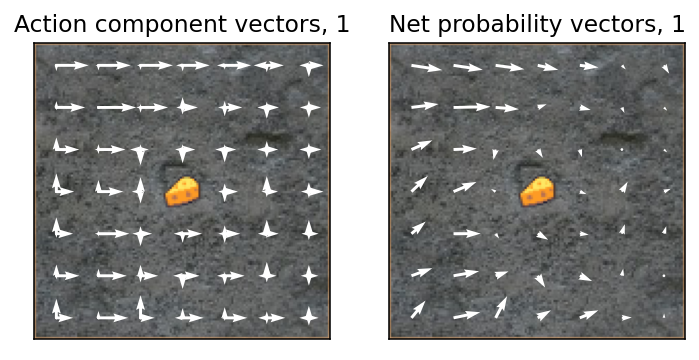

In [8]:
seed = 0

def compare_component_probabilities(venv = venv_empty, seed=seed, hook_0=hook, name='Model'):
    fig, axs = plt.subplots(1, 2, figsize=(2*AX_SIZE, 2*AX_SIZE))
    vf = vfield.vector_field(venv, policy=hook_0.network)
    vfield.plot_vf(vf, ax=axs[0], show_components=True)
    axs[0].set_title('Action component vectors, {}'.format(name))
    
    vfield.plot_vf(vf, ax=axs[1], show_components=False)
    axs[1].set_title('Net probability vectors, {}'.format(name))

venv_test = venv_cheese
compare_component_probabilities(venv_test, seed, hook1, "15")
compare_component_probabilities(venv_test, seed, hook2, "1")